# **Project 2: Tìm hiểu thuật toán SVM và ứng dụng trong phân loại ảnh**

Sinh viên: Vũ Quang Nam - 20215622

GVHD: Ts. Đỗ Tiến Dũng

Máy Vector Hỗ Trợ (Support Vector Machines hay SVMs) là các thuật toán học máy giám sát được sử dụng cho mục đích phân loại và hồi quy. Trong bài viết này, em xây dựng một bộ phân loại Máy Vector Hỗ Trợ để phân loại một ngôi sao Pulsar. Em đã sử dụng bộ dữ liệu "Predicting a Pulsar Star" cho dự án này.

# 1. Giới thiệu thuật toán Support Vector Machines
**Siêu Phẳng (Hyperplane)**

Một siêu phẳng là ranh giới quyết định phân chia giữa các điểm dữ liệu được cho với các nhãn lớp khác nhau. Bộ phân loại SVM phân chia các điểm dữ liệu bằng một siêu phẳng có độ lớn lớn nhất của ranh giới. Siêu phẳng này được biết đến là siêu phẳng độ lớn tối đa và bộ phân loại tuyến tính mà nó xác định được biết đến là bộ phân loại độ lớn tối đa (maximum margin classifier).

**Các Vector Hỗ Trợ (Support Vectors)**

Các vector hỗ trợ là các điểm dữ liệu mẫu, gần nhất với siêu phẳng. Những điểm dữ liệu này sẽ xác định đường thẳng hoặc siêu phẳng phân chia tốt hơn bằng cách tính toán các ranh giới.

**Ranh Giới (Margin)**

Một ranh giới là khoảng cách phân chia giữa hai đường trên các điểm dữ liệu gần nhất. Nó được tính toán là khoảng cách vuông góc từ đường tới các vector hỗ trợ hoặc các điểm dữ liệu gần nhất. Trong SVMs, chúng ta cố gắng tối đa hóa khoảng cách phân chia này để có được ranh giới lớn nhất.

Hình ảnh sau đây minh họa các khái niệm này một cách trực quan.

 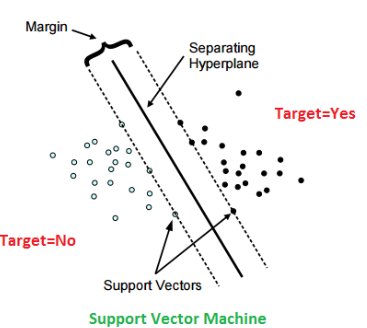


**SVM Dưới Bộ Trang Bị**

Trong SVMs, mục tiêu chính của chúng ta là chọn một siêu phẳng với độ lớn ranh giới tối đa giữa các vector hỗ trợ trong tập dữ liệu đã cho. SVM tìm kiếm siêu phẳng độ lớn tối đa trong quá trình 2 bước sau:

1. Tạo ra các siêu phẳng phân tách các lớp một cách tốt nhất có thể. Có nhiều siêu phẳng có thể phân loại dữ liệu. Chúng ta nên tìm kiếm siêu phẳng tốt nhất mà đại diện cho sự phân chia lớn nhất, hoặc ranh giới, giữa hai lớp.
2. Vì vậy, chúng ta chọn siêu phẳng sao cho khoảng cách từ nó đến các vector hỗ trợ ở mỗi bên được tối đa hóa. Nếu tồn tại một siêu phẳng như vậy, nó được biết đến là siêu phẳng độ lớn tối đa và bộ phân loại tuyến tính mà nó xác định được biết đến là một bộ phân loại độ lớn tối đa.

Hình ảnh dưới đây minh họa khái niệm về ranh giới tối đa và siêu phẳng độ lớn tối đa một cách rõ ràng.

**Siêu phẳng lề tối đa**
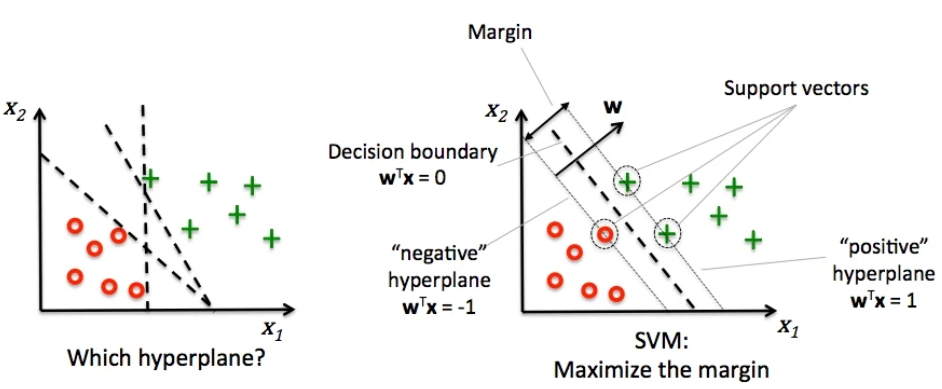

**Vấn Đề với Các Bộ Dữ Liệu Phân Tán**

Đôi khi, các điểm dữ liệu mẫu được phân tán đến mức không thể phân chia chúng bằng một siêu phẳng tuyến tính. Trong tình huống như vậy, SVMs sử dụng một kỹ thuật kernel trick để chuyển đổi không gian đầu vào thành không gian chiều cao hơn như được thể hiện trong hình dưới đây. Nó sử dụng một hàm ánh xạ để chuyển đổi không gian đầu vào 2-D thành không gian đầu vào 3-D. Bây giờ, chúng ta có thể dễ dàng phân chia các điểm dữ liệu bằng cách sử dụng phân chia tuyến tính.

# 2. Kernel trick (Kỹ thuật hạt nhân)

Trong thực tế, thuật toán SVM được thực hiện sử dụng một kernel. Nó sử dụng một kỹ thuật được gọi là kernel trick (Kỹ thuật hạt nhân). Đơn giản, một kernel chỉ là một hàm biến đổi dữ liệu thành một không gian chiều cao hơn nơi mà dữ liệu có thể phân tách được. Một kernel chuyển đổi không gian dữ liệu đầu vào chiều thấp thành một không gian chiều cao hơn. Do đó, nó chuyển đổi các vấn đề không tuyến tính phân chia thành các vấn đề tuyến tính phân chia bằng cách thêm các chiều vào. Vì vậy, kernel trick giúp chúng ta xây dựng một bộ phân loại chính xác hơn. Do đó, nó hữu ích trong các vấn đề phân tách không tuyến tính.

Chúng ta có thể định nghĩa một hàm kernel như sau:

Hàm hạt nhân

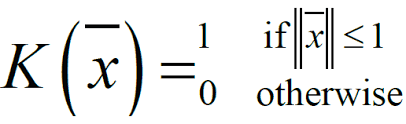


Trong ngữ cảnh của SVMs, có 4 kernel phổ biến – Kernel Tuyến tính, Kernel Đa thức, Kernel Hàm Cơ sở Đa tuyến (RBF) (còn được gọi là kernel Gaussian) và Kernel Sigmoid. Chúng được mô tả như sau

# 2.1 Linear kernel (Hạt nhân tuyến tính)

Trong kernel tuyến tính, hàm kernel có dạng là một hàm tuyến tính như sau:

**Kernel tuyến tính: K(xi , xj ) = xiT xj**

Kernel tuyến tính được sử dụng khi dữ liệu có thể phân chia tuyến tính. Điều này có nghĩa là dữ liệu có thể được phân chia bằng một đường thẳng duy nhất. Đây là một trong những kernel phổ biến nhất được sử dụng. Nó thường được sử dụng khi có một số lượng lớn các đặc trưng trong tập dữ liệu. Kernel tuyến tính thường được sử dụng cho mục đích phân loại văn bản.

Việc huấn luyện với kernel tuyến tính thường nhanh hơn, vì chúng ta chỉ cần tối ưu hóa tham số điều chuẩn C. Khi huấn luyện với các kernel khác, chúng ta cũng cần tối ưu hóa tham số γ. Vì vậy, việc thực hiện tìm kiếm trên lưới (grid search) thường sẽ mất nhiều thời gian hơn.

Kernel tuyến tính có thể được minh họa bằng hình dưới đây.

**Kernel Tuyến Tính**

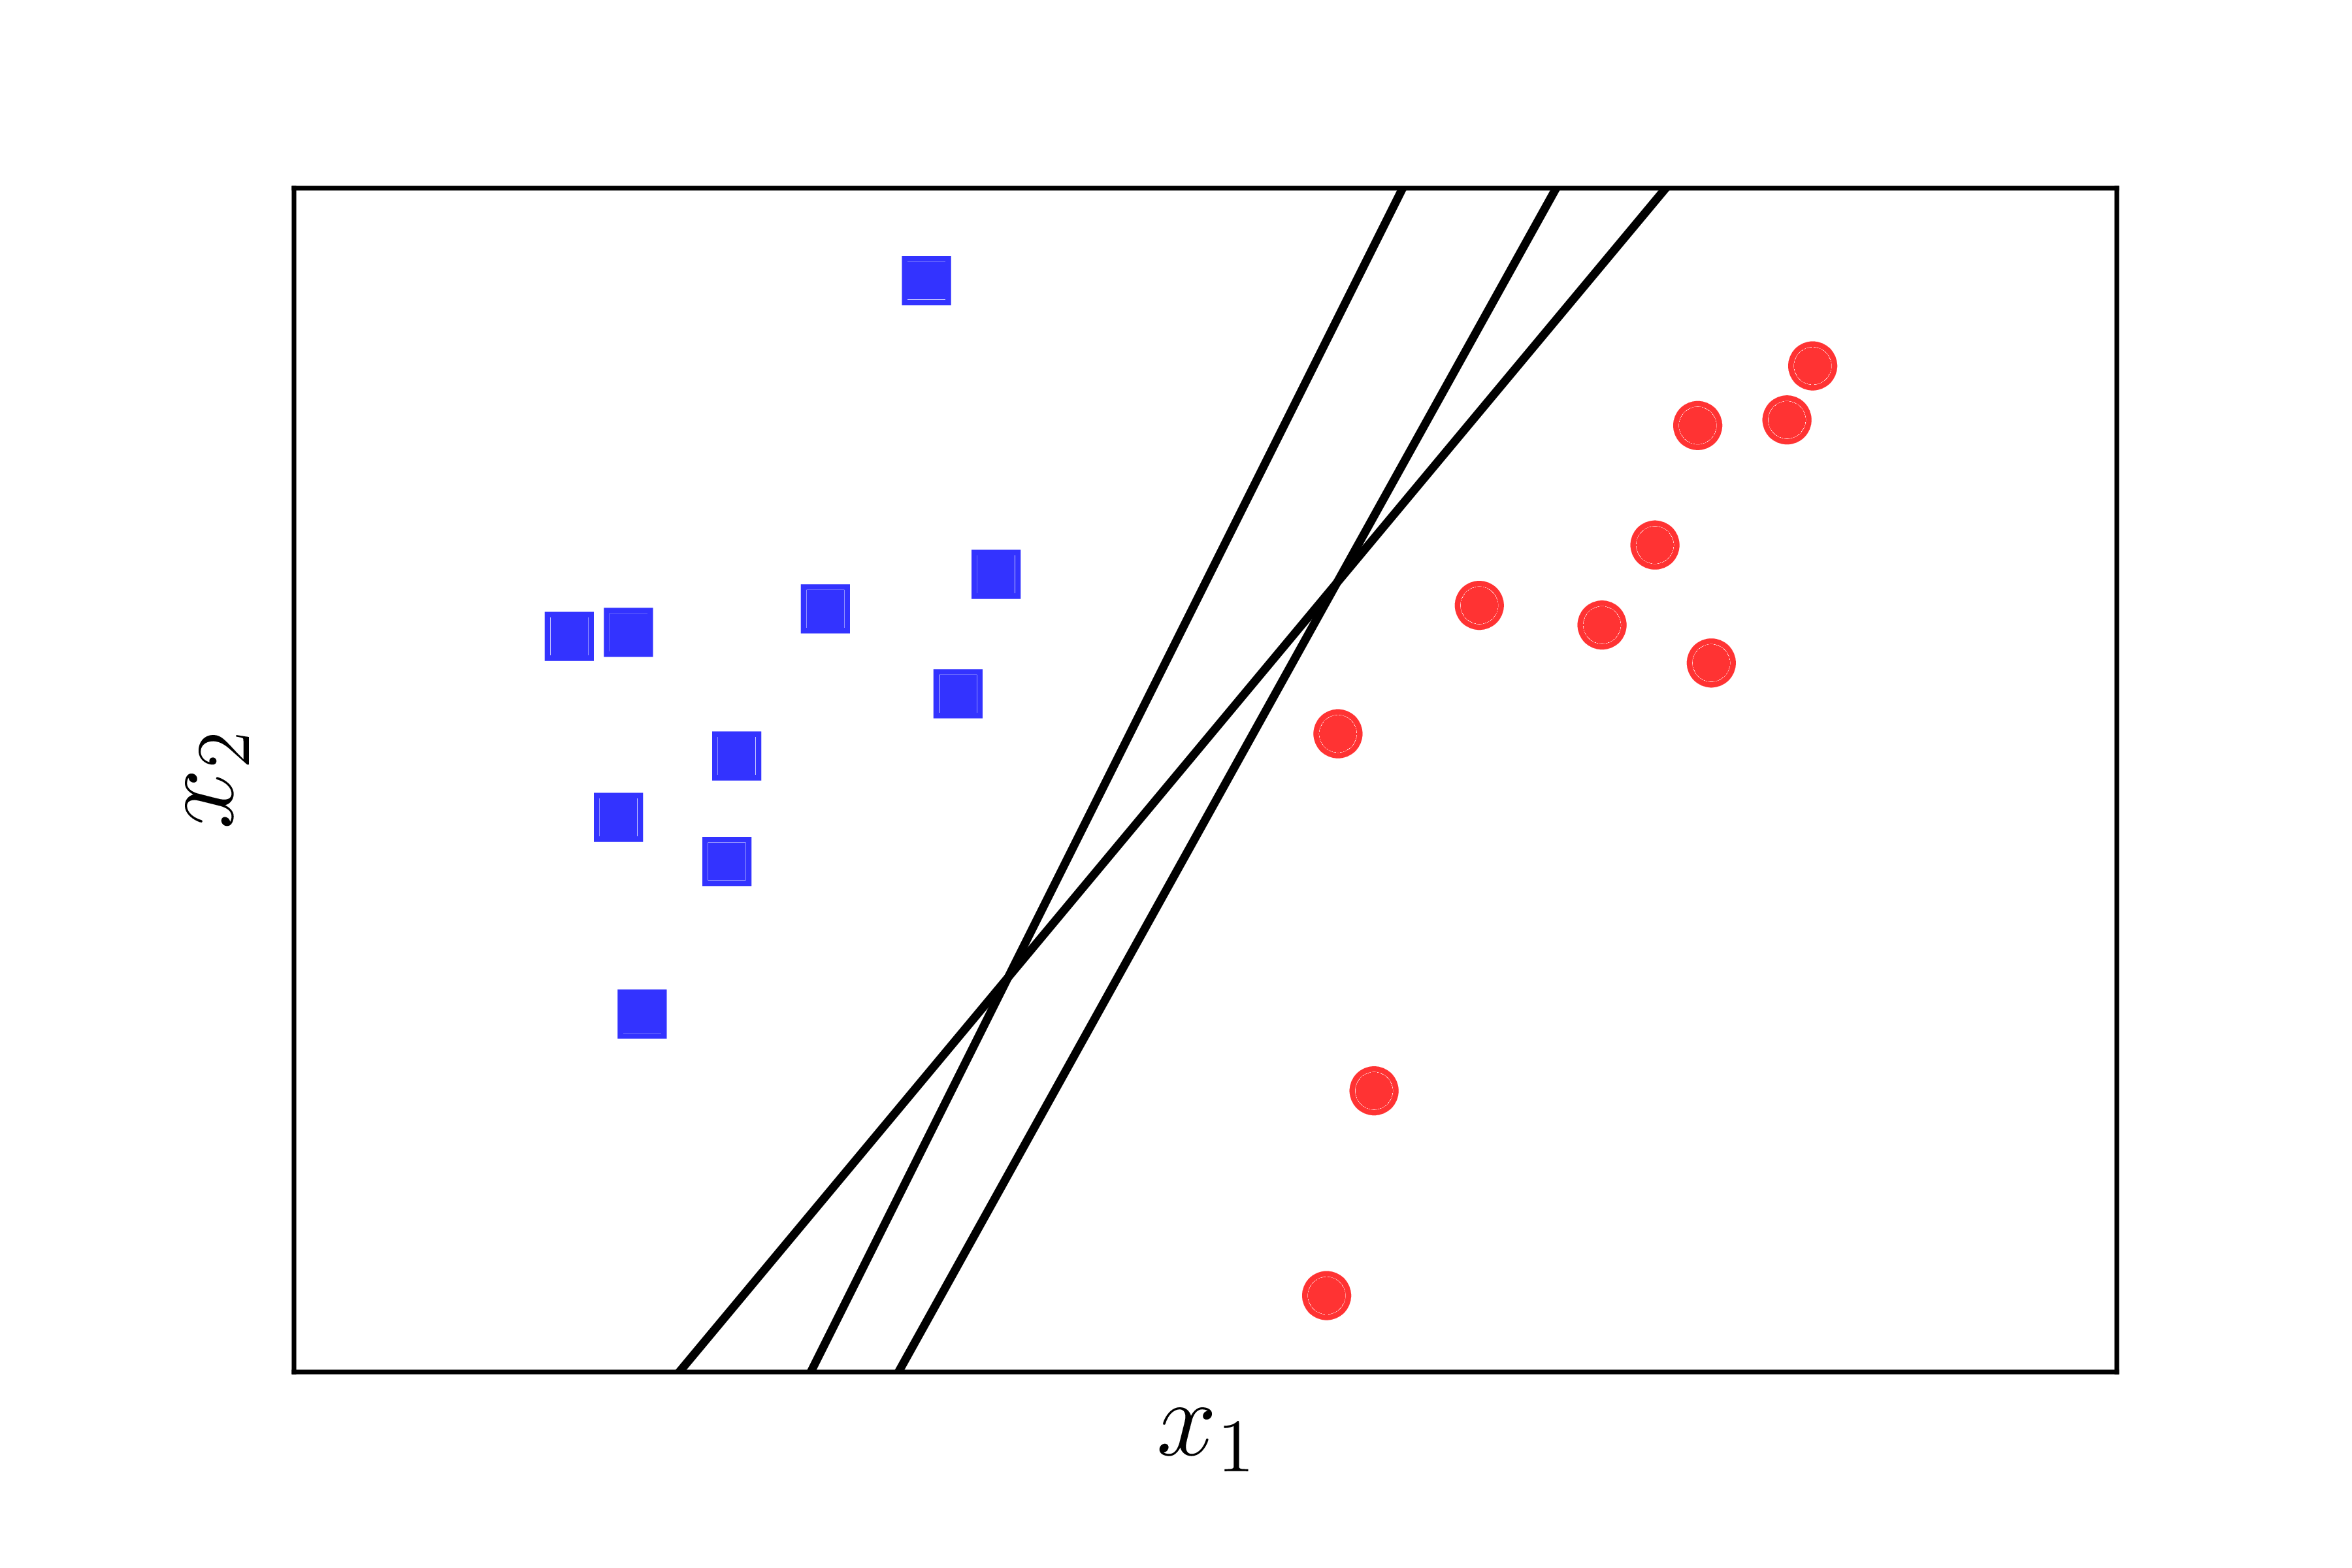

# 2.2 Polynomial Kernel (Kernel Đa Thức)

Kernel đa thức biểu diễn sự tương đồng của các vector (mẫu huấn luyện) trong không gian đặc trưng qua đa thức của các biến ban đầu. Kernel đa thức không chỉ xem xét các đặc trưng đã cho của các mẫu đầu vào để xác định sự tương đồng của chúng, mà còn xem xét các kết hợp của các mẫu đầu vào.

Đối với đa thức bậc d, kernel đa thức được định nghĩa như sau -

**Kernel đa thức : K(xi , xj ) = (γxiT xj + r)^d , γ > 0**

Kernel đa thức rất phổ biến trong Xử lý Ngôn Ngữ Tự Nhiên. Bậc thường gặp nhất là d = 2 (bậc hai), vì các bậc lớn hơn có xu hướng overfitting trên các vấn đề NLP. Nó có thể được minh họa bằng hình dưới đây.

**Kernel Đa Thức**

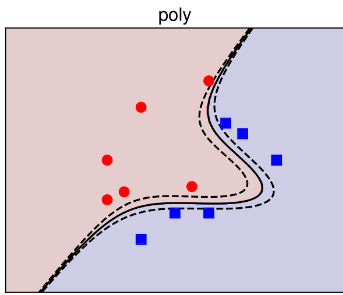

# 2.3 Kernel Hàm Cơ sở Đa Tuyến (RBF)

Kernel hàm cơ sở đa tuyến là một kernel đa dụng. Nó được sử dụng khi chúng ta không có kiến thức trước về dữ liệu. Kernel RBF trên hai mẫu x và y được định nghĩa bởi phương trình sau:

**Kernel Hàm Cơ Sở Đa Tuyến (RBF)**

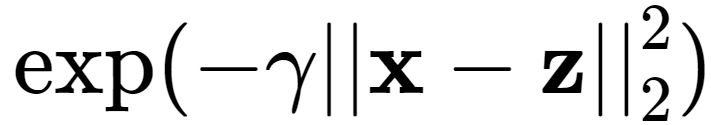


Hình dưới đây minh họa quá trình phân loại SVM sử dụng kernel RBF.

Phân Loại SVM với kernel RBF


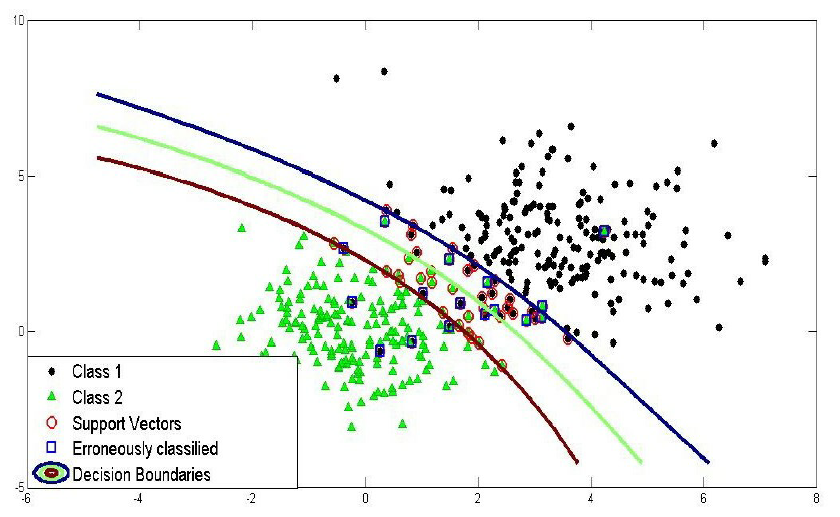

# 2.4 Kernel Sigmoid

Kernel Sigmoid có nguồn gốc từ mạng neural. Chúng ta có thể sử dụng nó như là một phương pháp đại diện cho mạng neural. Kernel Sigmoid được định nghĩa bởi phương trình sau

**kernel sigmoid : k (x, y) = tanh(αxTy + c)**

Kernel Sigmoid có thể được minh họa bằng hình dưới đây -

**Kernel Sigmoid
**

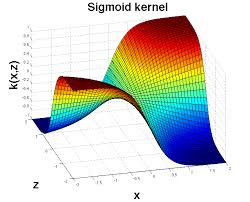

# 3. Thư viện SVM Scikit-Learn

Scikit-Learn cung cấp các thư viện hữu ích để triển khai thuật toán Support Vector Machine trên một tập dữ liệu. Có rất nhiều thư viện có thể giúp chúng ta triển khai SVM một cách mượt mà. Chúng ta chỉ cần gọi thư viện với các tham số phù hợp với nhu cầu của chúng ta. Trong dự án này, em đang xử lý một nhiệm vụ phân loại. Vì vậy, em sẽ đề cập đến các thư viện Scikit-Learn cho mục đích phân loại SVM.

Đầu tiên, có một bộ phân loại LinearSVC(). Như tên gọi, bộ phân loại này chỉ sử dụng kernel tuyến tính. Trong bộ phân loại LinearSVC(), chúng ta không cần truyền giá trị của kernel vì nó chỉ được sử dụng cho mục đích phân loại tuyến tính.

Scikit-Learn cung cấp hai bộ phân loại khác - SVC() và NuSVC() được sử dụng cho mục đích phân loại. Các bộ phân loại này phần lớn tương tự nhau với một số khác biệt về các tham số. NuSVC() tương tự như SVC() nhưng sử dụng một tham số để điều chỉnh số lượng vector hỗ trợ. Chúng ta truyền các giá trị của kernel, gamma và C cùng với các tham số khác. Mặc định, tham số kernel sử dụng rbf như giá trị của nó nhưng chúng ta có thể truyền các giá trị như poly, linear, sigmoid hoặc hàm gọi được (callable function).

# 4. Mô tả bộ dữ liệu

Em đã sử dụng bộ dữ liệu "Predicting a Pulsar Star" cho dự án này.

Pulsars là một loại hiếm hoi của sao neutron tạo ra sóng radio có thể phát hiện được trên Trái Đất. Chúng có sự quan tâm lớn của khoa học như là công cụ nghiên cứu về không gian-thời gian, môi trường liên sao và các trạng thái của vật chất. Các thuật toán phân loại đặc biệt đang được áp dụng, xử lý bộ dữ liệu như là các vấn đề phân loại nhị phân. Ở đây, các ví dụ pulsar hợp lệ tạo thành lớp tích cực ít và các ví dụ giả tạo tạo thành lớp tiêu cực đa số.

Bộ dữ liệu được chia sẻ ở đây chứa 16,259 ví dụ giả tạo do RFI/nhiễu, và 1,639 ví dụ pulsar thực. Mỗi hàng liệt kê trước các biến và nhãn lớp là mục nhập cuối cùng. Các nhãn lớp được sử dụng là 0 (âm) và 1 (dương).

Thông Tin Thuộc Tính:
Mỗi ứng viên được mô tả bởi 8 biến liên tục, và một biến lớp duy nhất. Bốn biến đầu tiên là thống kê đơn giản được thu được từ hồi quy xung tích hợp. Bốn biến còn lại được thu được tương tự từ đường cong DM-SNR. Các biến này được tóm tắt như sau:

1. Giá trị trung bình (Mean) của hồi quy tích hợp.
2. Độ lệch chuẩn (Standard deviation) của hồi quy tích hợp.
3. Độ nhọn quá mức (Excess kurtosis) của hồi quy tích hợp.
4. Độ lệch (Skewness) của hồi quy tích hợp.
5. Giá trị trung bình của đường cong DM-SNR.
6. Độ lệch chuẩn (Standard deviation) của đường cong DM-SNR.
7. Độ nhọn quá mức (Excess kurtosis) của đường cong DM-SNR.
8. Độ lệch (Skewness) của đường cong DM-SNR.
9. Lớp



# 5. Import thư viện

Nhập các thư viện Python cần thiết.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pulsar-stars/pulsar_stars.csv
/kaggle/input/pulsar-dataset/pulsar_stars.csv


In [5]:
import warnings

warnings.filterwarnings('ignore') #Tắt cảnh báo

# 6. Nhập bộ dữ liệu 

In [6]:
data = '/kaggle/input/pulsar-dataset/pulsar_stars.csv'

df = pd.read_csv(data)
print('READ OK')

READ OK


# 7. Phân tích khám phá dữ liệu

Bây giờ, em sẽ phân tích dữ liệu để có cái nhìn sâu hơn về bộ dữ liệu.

In [7]:
# view dimensions of dataset

df.shape

(17898, 9)

In [8]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Chúng ta có thể thấy rằng có 9 biến trong tập dữ liệu. 8 biến là biến liên tục và 1 biến là biến rời rạc. Biến rời rạc đó là biến target_class. Đây cũng là biến mục tiêu.

Bây giờ, em sẽ xem tên các cột để kiểm tra xem có khoảng trắng ở đầu và cuối không.

In [9]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Chúng ta có thể thấy rằng có các khoảng trắng ở đầu (khoảng trắng ở đầu tên chuỗi) trong dataframe. Vì vậy, em sẽ loại bỏ những khoảng trắng này.

In [10]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [11]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Chúng ta có thể thấy rằng các khoảng trắng ở đầu đã được loại bỏ khỏi tên cột. Nhưng tên các cột rất dài. Vì vậy, em sẽ làm cho chúng ngắn hơn bằng cách đổi tên chúng.

In [12]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [13]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

**Kiểm tra độ phân tán của biến target** 

In [14]:
# check distribution of target_class column

df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [15]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/float(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

Chúng ta có thể thấy rằng phần trăm quan sát của nhãn lớp 0 và 1 là 90,84% và 9,16%. Vì vậy, đây là một vấn đề mất cân bằng giữa các lớp. Em sẽ xử lý vấn đề này trong phần sau.

In [16]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Chúng ta có thể thấy rằng không có giá trị thiếu trong tập dữ liệu và tất cả các biến đều là biến số.







**Kiểm tra các giá trị trống trong biến**

In [17]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Chúng ta có thể thấy rằng không có giá trị thiếu trong tập dữ liệu.

**Tóm tắt về biến số**
* Có 9 biến số trong tập dữ liệu.
* 8 biến là biến liên tục và 1 biến là biến rời rạc.
* Biến rời rạc là biến target_class. Đây cũng là biến mục tiêu.
* Không có giá trị thiếu trong tập dữ liệu.

**Các ngoại lệ trong biến số**

In [18]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Trên sự kiểm tra cẩn thận, chúng ta có thể nghi ngờ rằng tất cả các biến liên tục có thể chứa ngoại lệ.

Em sẽ vẽ biểu đồ boxplot để trực quan hóa ngoại lệ trong các biến trên.

Text(0, 0.5, 'DM-SNR Skewness')

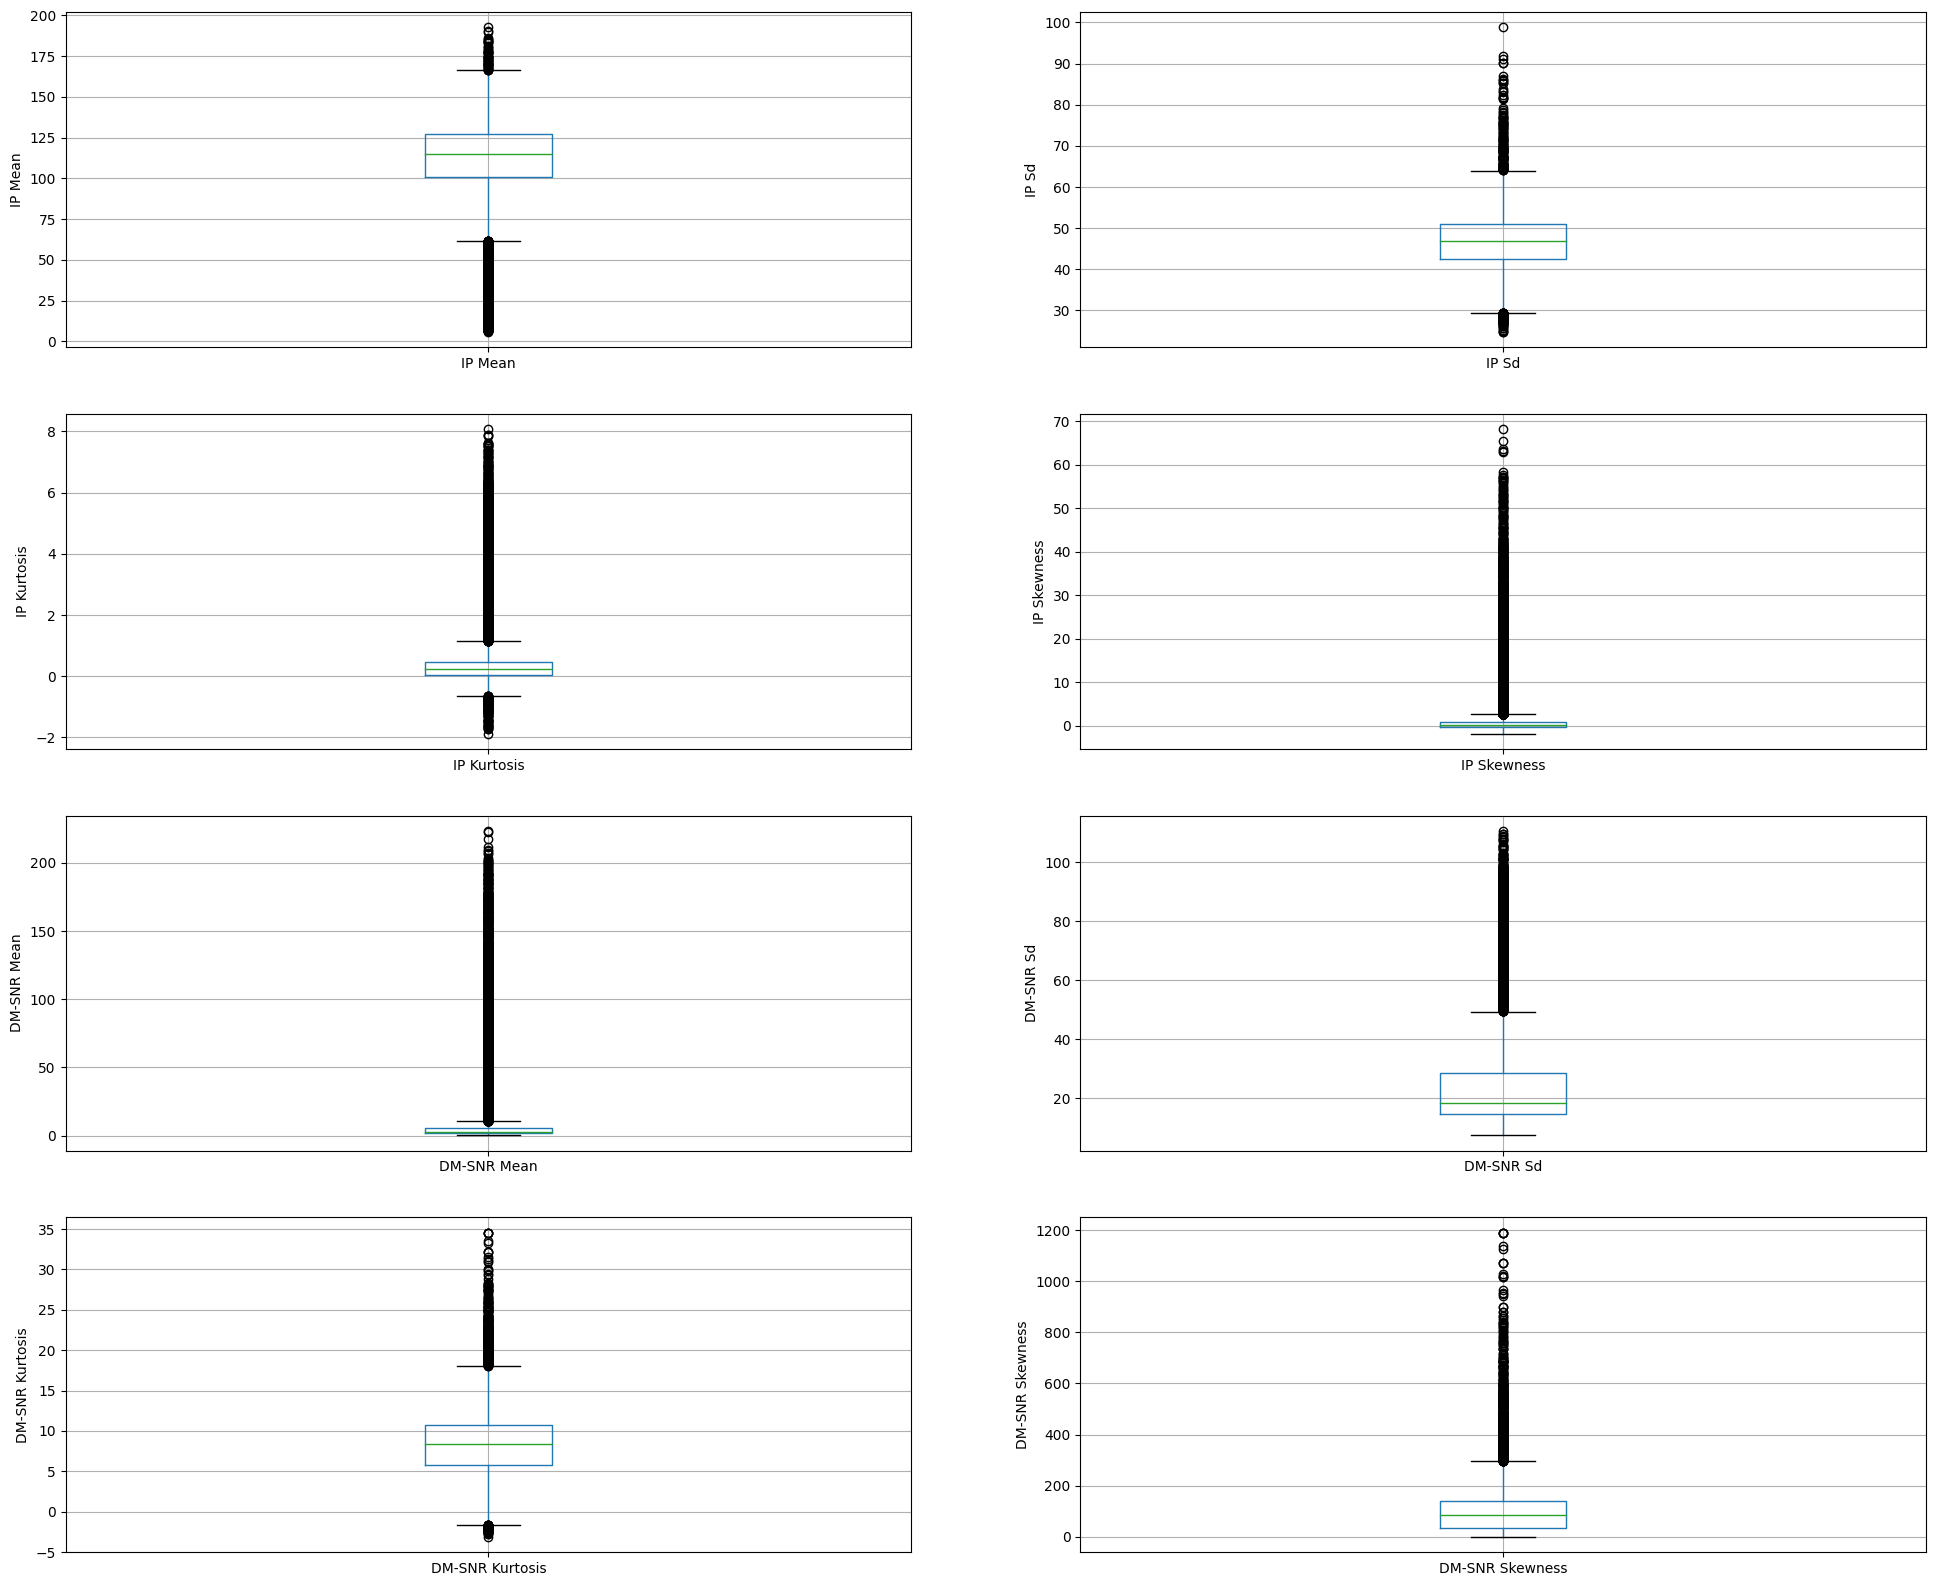

In [19]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Các biểu đồ boxplot trên xác nhận rằng có rất nhiều ngoại lệ trong các biến này.

**Xử lý ngoại lệ với SVMs**

Có 2 biến thể của SVMs. Chúng là biến thể hard-margin của SVM và biến thể soft-margin của SVM.

Biến thể hard-margin của SVM không xử lý ngoại lệ. Trong trường hợp này, chúng ta muốn tìm ra siêu mặt phẳng có độ rộng lớn nhất sao cho mỗi điểm huấn luyện được phân loại đúng với độ rộng ít nhất là 1. Kỹ thuật này không xử lý ngoại lệ tốt.

Một phiên bản khác của SVM được gọi là biến thể soft-margin của SVM. Trong trường hợp này, chúng ta có thể có một số điểm bị phân loại sai hoặc phân loại với một độ rộng nhỏ hơn 1. Nhưng đối với mỗi điểm như vậy, chúng ta phải trả một mức phạt dưới dạng tham số C, điều khiển các ngoại lệ. Giá trị C thấp cho phép chúng ta chấp nhận nhiều ngoại lệ hơn và giá trị C cao cho phép ít ngoại lệ hơn.

Thông điệp ở đây là vì tập dữ liệu chứa ngoại lệ, vì vậy giá trị của C nên là cao khi huấn luyện mô hình.

**Kiểm tra phân phối của biến**

Bây giờ, em sẽ vẽ các đồ thị histogram để kiểm tra phân phối và xem xét xem chúng có chuẩn hay lệch.

Text(0, 0.5, 'Number of pulsar stars')

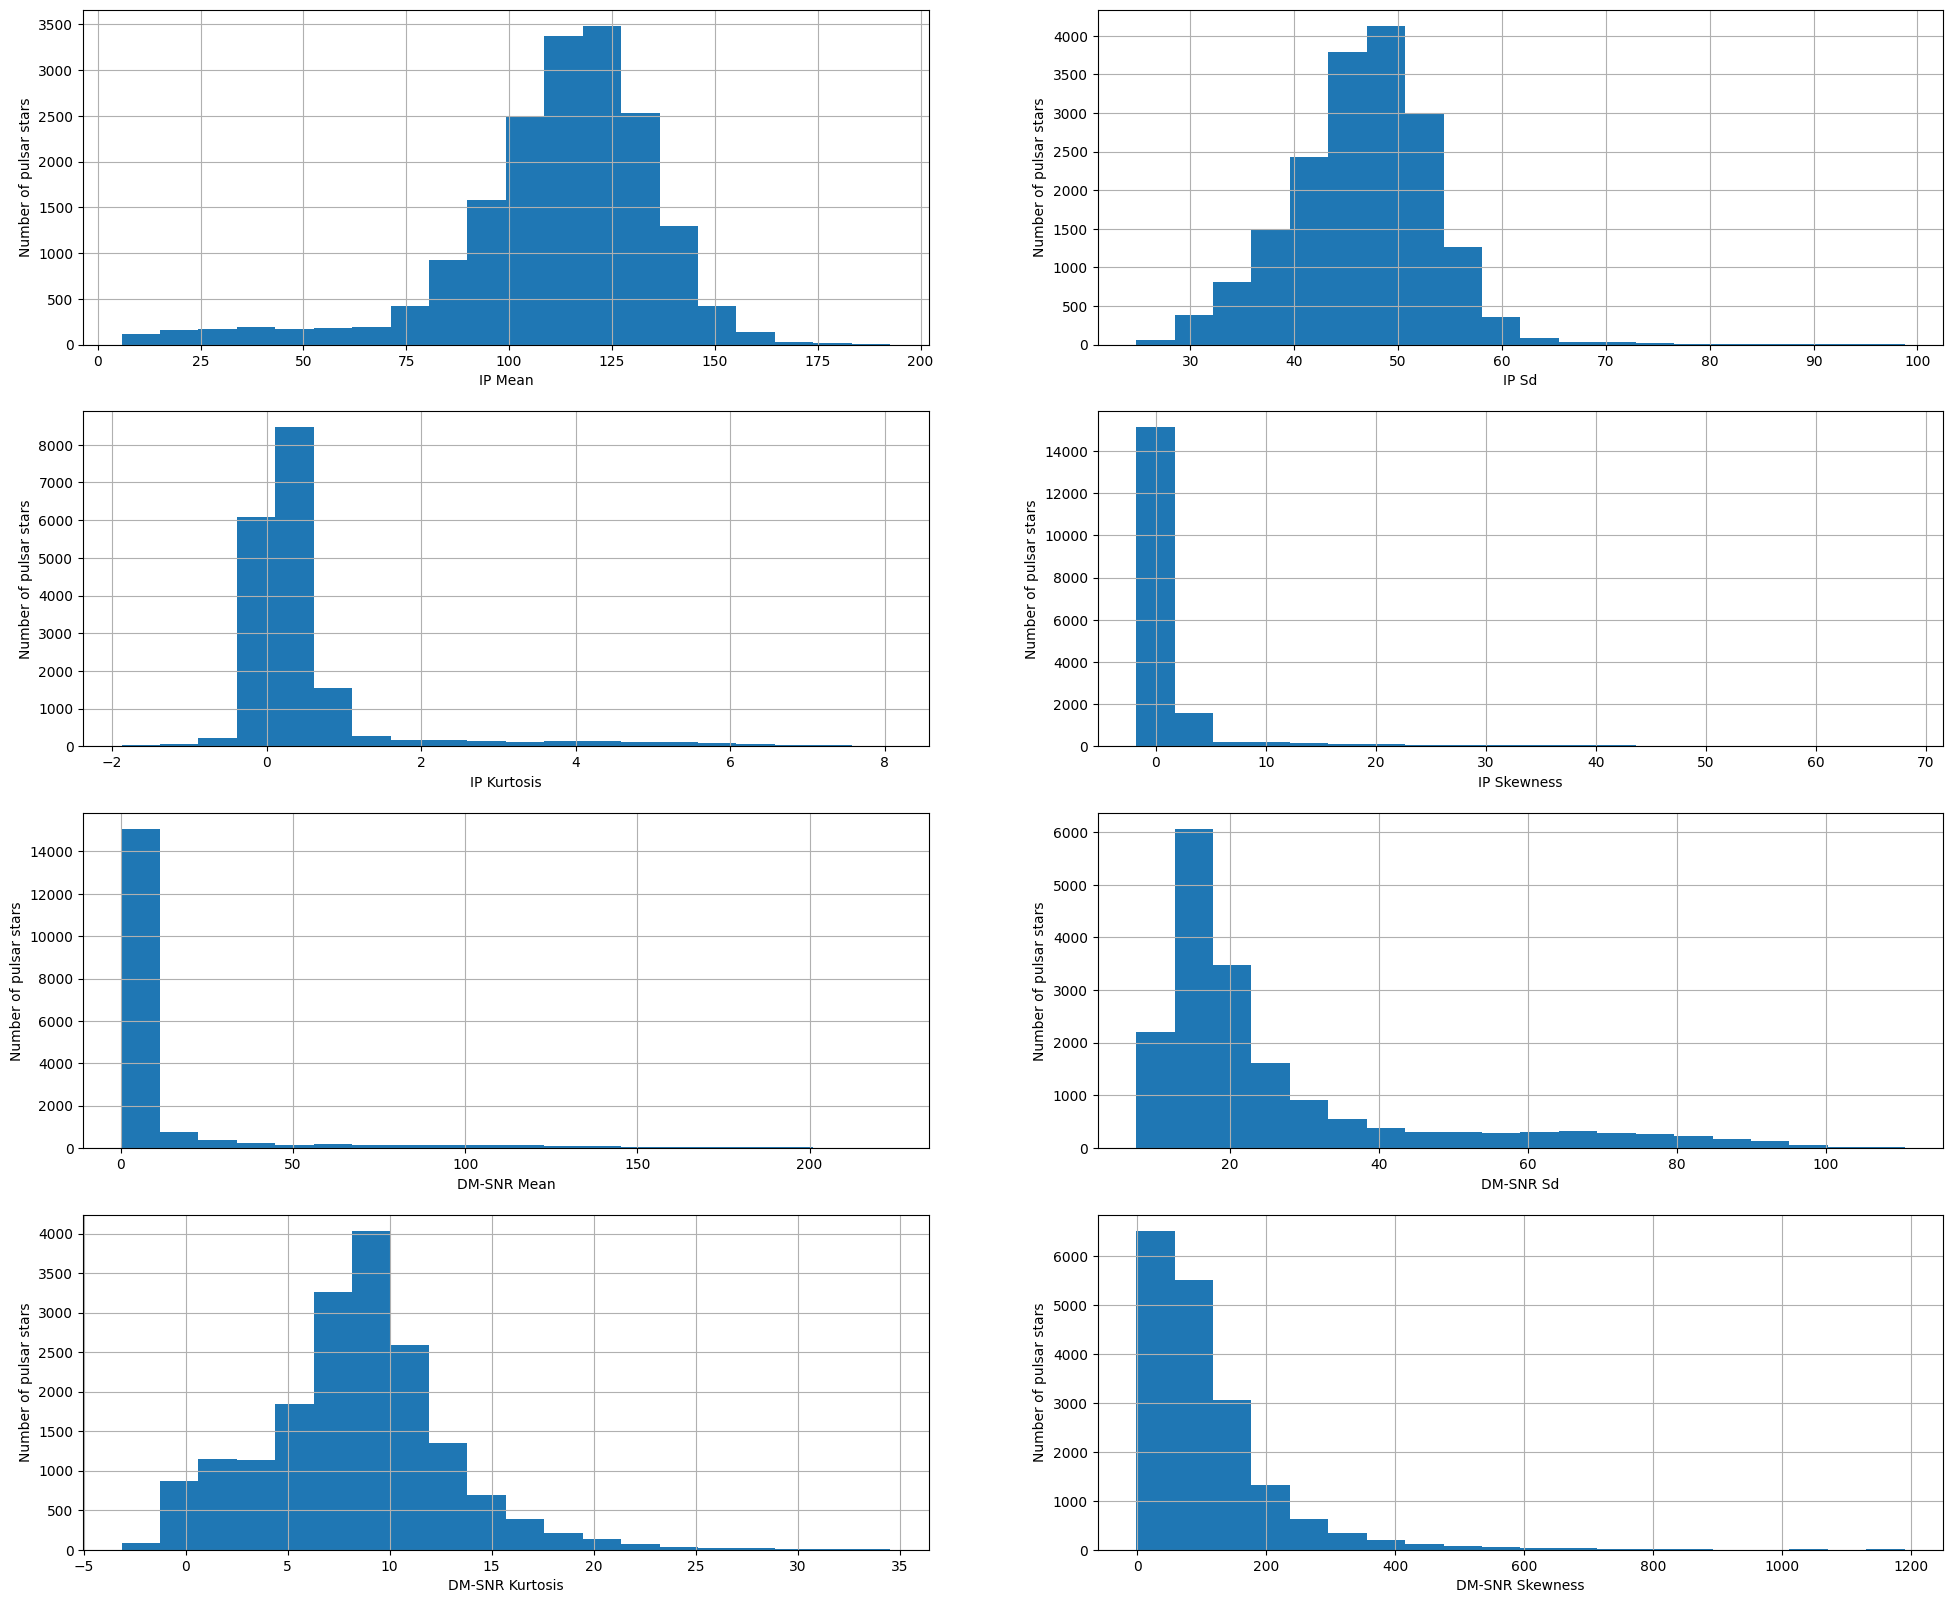

In [20]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

Chúng ta có thể thấy rằng tất cả 8 biến liên tục đều bị lệch.

# 8. Khai báo vector đặc trưng và biến mục tiêu


In [21]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

# 9. Chia dữ liệu thành tập huấn luyện và tập kiểm tra riêng biệt

In [22]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# 10. Chuẩn hóa Đặc Trưng

In [24]:
cols = X_train.columns

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [27]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [28]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


Bây giờ chúng ta đã có tập dữ liệu X_train sẵn sàng để đưa vào bộ phân loại. Em sẽ làm điều đó như sau.

# 11. Chạy SVM với siêu tham số mặc định

Siêu tham số mặc định có nghĩa là C=1.0, kernel=rbf và gamma=auto trong số các tham số khác.

In [29]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


**Chạy SVM với kernel rbf và C=100.0**

Chúng ta đã thấy rằng có những ngoại lệ trong tập dữ liệu của chúng ta. Vì vậy, chúng ta nên tăng giá trị của C vì C cao hơn có nghĩa là ít giá trị ngoại lệ hơn. Vì vậy, em sẽ chạy SVM với kernel=rbf và C=100.0.

In [30]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


Chúng ta có thể thấy rằng chúng ta đạt được độ chính xác cao hơn với C=100,0 vì C cao hơn có nghĩa là ít giá trị ngoại lệ hơn.

Bây giờ, em sẽ tăng thêm giá trị C=1000.0 và kiểm tra độ chính xác.

In [31]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


Trong trường hợp này, chúng ta có thể thấy rằng độ chính xác đã giảm với C=1000,0

# 12. Run SVM with linear kernel

**Run SVM with linear kernel and C=1.0**

In [32]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


**Run SVM with linear kernel and C=100.0**

In [33]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


Run SVM with linear kernel and C=1000.0

In [34]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


Có thể thấy rằng chúng ta có thể đạt được độ chính xác cao hơn với C=100.0 và C=1000.0 so với C=1.0.

Ở đây, y_test là nhãn lớp thực và y_pred là nhãn lớp được dự đoán trong tập kiểm tra.

So sánh độ chính xác của tập huấn luyện và tập kiểm tra
Bây giờ, em sẽ so sánh độ chính xác của tập huấn luyện và tập kiểm tra để kiểm tra xem có trang bị quá mức hay không.

In [35]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


Có thể thấy rằng độ chính xác của tập huấn luyện và tập kiểm tra là tương đương nhau.

**Kiểm tra quá mức và thiếu mức fitting**







In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


Điểm chính xác trên tập huấn luyện là 0.9783 trong khi điểm chính xác trên tập kiểm tra là 0.9830. Hai giá trị này khá tương đương. Vì vậy, không có vấn đề về quá mức fitting.

**So sánh độ chính xác của mô hình với độ chính xác null**

Vì vậy, độ chính xác của mô hình là 0.9832. Tuy nhiên, chúng ta không thể nói rằng mô hình của chúng ta rất tốt dựa trên độ chính xác trên. Chúng ta phải so sánh nó với độ chính xác null. Độ chính xác null là độ chính xác có thể đạt được bằng cách luôn dự đoán lớp phổ biến nhất.

Vì vậy, trước tiên chúng ta nên kiểm tra phân phối lớp trong tập kiểm tra.

In [38]:
# check class distribution in test set

y_test.value_counts()

target_class
0    3306
1     274
Name: count, dtype: int64

Chúng ta có thể thấy rằng số lần xuất hiện của lớp phổ biến nhất 0 là 3306. Vì vậy, chúng ta có thể tính độ chính xác null bằng cách chia 3306 cho tổng số lần xuất hiện.

In [39]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


Chúng ta có thể thấy rằng điểm chính xác của mô hình của chúng ta là 0,9830 nhưng điểm chính xác không là 0,9235. Vì vậy, chúng ta có thể kết luận rằng trình phân loại SVM của chúng ta đang làm rất tốt việc dự đoán nhãn lớp.

# 13. Chạy SVM với kernel đa thức

**Chạy SVM với kernel đa thức và C=1.0**

In [40]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


**Run SVM with polynomial kernel and C=100.0**

In [41]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


Hạt nhân đa thức cho hiệu suất kém. Nó có thể được trang bị quá mức cho tập huấn luyện.

# 14. Chạy SVM với kernel sigmoid

**Chạy SVM với kernel sigmoid và C=1.0**

In [42]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


Chạy SVM với kernel sigmoid và C=100.0

In [43]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


Chúng ta có thể thấy rằng kernel sigmoid cũng hoạt động kém như kernel đa thức.

**Nhận xét**

Chúng ta đạt độ chính xác tối đa với kernel rbf và linear với C=100.0 và độ chính xác là 0.9832. Dựa trên phân tích trên, chúng ta có thể kết luận rằng độ chính xác của mô hình phân loại của chúng ta rất tốt. Mô hình của chúng ta đang làm rất tốt trong việc dự đoán các nhãn lớp.

Nhưng, điều này không đúng. Ở đây, chúng ta có một tập dữ liệu mất cân bằng. Vấn đề là độ chính xác là một phép đo không đủ để đánh giá hiệu suất dự đoán trong vấn đề tập dữ liệu mất cân bằng.

Vì vậy, chúng ta phải khám phá các phương pháp đo thay thế mang lại hướng dẫn tốt hơn trong việc lựa chọn mô hình. Đặc biệt, chúng ta muốn biết phân phối các giá trị cơ bản và loại lỗi mà bộ phân loại của chúng ta đang gặp phải.

Một trong số các phương pháp đo để phân tích hiệu suất của mô hình trong vấn đề các lớp mất cân bằng là ma trận nhầm lẫn.

# 15. Ma trận nhầm lẫn

Ma trận nhầm lẫn là một công cụ để tóm tắt hiệu suất của một thuật toán phân loại. Một ma trận nhầm lẫn sẽ cho chúng ta một cái nhìn rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi mà mô hình tạo ra. Nó cung cấp cho chúng ta một bản tóm tắt về các dự đoán đúng và sai được chia thành từng danh mục. Bản tóm tắt được đại diện dưới dạng bảng.

Có bốn loại kết quả có thể xảy ra khi đánh giá hiệu suất của một mô hình phân loại. Bốn kết quả này được mô tả dưới đây:-

**True Positives (TP)** – Tích cực thực sự xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát thực sự thuộc về lớp đó.

**True Negatives (TN)** – Âm tính thực sự xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định và quan sát thực sự không thuộc về lớp đó.

**False Positives (FP)** – Dương tính giả xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định nhưng quan sát thực sự không thuộc về lớp đó. Loại lỗi này được gọi là **lỗi loại I**.

**False Negatives (FN)** – Âm tính giả xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định nhưng quan sát thực sự thuộc về lớp đó. Đây là một loại lỗi rất nghiêm trọng và được gọi là **lỗi loại II**.

Bốn kết quả này được tóm tắt trong một ma trận nhầm lẫn được đưa ra dưới đây.

In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


Ma trận nhầm lẫn hiển thị 3289 + 230 = 3519 dự đoán đúng và 17 + 44 = 61 dự đoán sai.

Trong trường hợp này, ta có

* Kết quả tích cực thực sự (Dương thực thực tế:1 và Tích cực dự đoán:1) - 3289
* Âm tính thực sự (Âm tính thực tế: 0 và Âm tính dự đoán: 0) - 230
* Dương tính giả (Âm tính thực tế:0 nhưng Dự đoán dương tính:1) - 17 (Lỗi loại I)
* Âm tính giả (Dương tính thực tế:1 nhưng Dự đoán âm tính:0) - 44 (Lỗi loại II)

<Axes: >

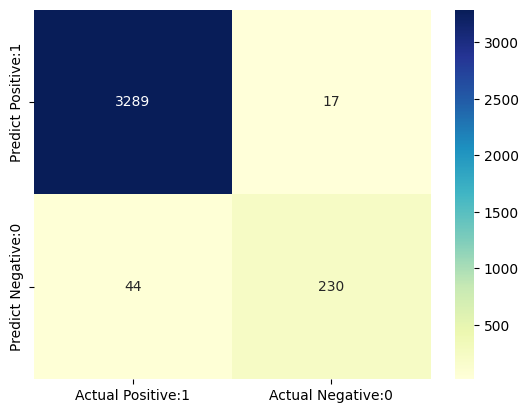

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 16. Các chỉ số đánh giá phân loại

**Báo cáo phân loại**

Báo cáo phân loại là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị các điểm chính xác (precision), độ phủ (recall), f1 và số lượng hỗ trợ cho mô hình. 
Chúng ta có thể in ra một báo cáo phân loại như sau:







In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



# 17. Đường cong ROC - AUC

**Đường cong ROC**
Một công cụ khác để đo lường hiệu suất của mô hình phân loại một cách trực quan là **Đường cong ROC**. Đường cong ROC viết tắt của Receiver Operating Characteristic Curve. Một Đường cong ROC là một biểu đồ mà cho thấy hiệu suất của một mô hình phân loại ở các mức ngưỡng phân loại khác nhau.

Đường cong ROC vẽ True Positive Rate (TPR) so với False Positive Rate (FPR) ở các mức ngưỡng phân loại khác nhau.

True Positive Rate (TPR) còn được gọi là Recall. Nó được định nghĩa là tỷ lệ TP đến (TP + FN).

False Positive Rate (FPR) được định nghĩa là tỷ lệ FP đến (FP + TN).

Trong Đường cong ROC, chúng ta sẽ tập trung vào TPR (True Positive Rate) và FPR (False Positive Rate) của một điểm duy nhất. Điều này sẽ cho chúng ta hiệu suất chung của đường cong ROC bao gồm TPR và FPR ở các mức ngưỡng phân loại khác nhau. Vì vậy, một Đường cong ROC vẽ TPR so với FPR ở các mức ngưỡng phân loại khác nhau. Nếu chúng ta giảm các mức ngưỡng, có thể dẫn đến nhiều mục được phân loại là tích cực hơn. Nó sẽ tăng cả True Positives (TP) và False Positives (FP).

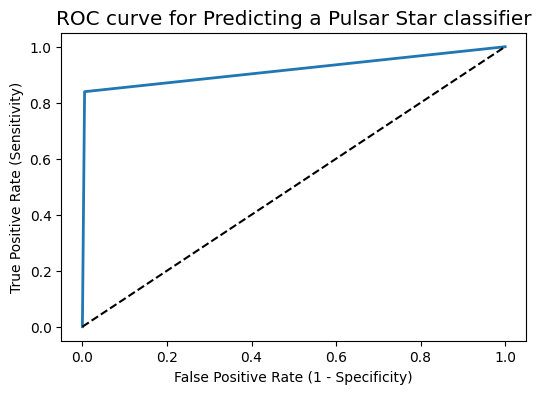

In [47]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Đường cong ROC giúp chúng ta chọn một mức ngưỡng cân bằng độ nhạy và độ đặc thù cho một ngữ cảnh cụ thể.

**ROC AUC**

**ROC AUC** viết tắt của **Receiver Operating Characteristic** - Diện Tích Dưới Đường cong. Đây là một kỹ thuật để so sánh hiệu suất của bộ phân loại. Trong kỹ thuật này, chúng ta đo lường diện tích dưới đường cong (AUC). Một bộ phân loại hoàn hảo sẽ có ROC AUC bằng 1, trong khi một bộ phân loại hoàn toàn ngẫu nhiên sẽ có ROC AUC bằng 0.5.

Vì vậy, ROC AUC là phần trăm của đồ thị ROC nằm dưới đường cong.

In [48]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


**Bình luận**

* ROC AUC là một bản tóm tắt bằng số duy nhất về hiệu suất của bộ phân loại. Giá trị càng cao thì khả năng phân loại càng tốt.

* ROC AUC trong mô hình tiến tới 1. Vì vậy, chúng ta có thể kết luận rằng bộ phân loại của chúng ta thực hiện tốt công việc phân loại sao xung.

In [49]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


# 18. Kiểm tra chéo Stratified k-fold với shuffle split

Kiểm tra chéo k-fold là một kỹ thuật rất hữu ích để đánh giá hiệu suất của mô hình. Nhưng, nó thất bại ở đây vì chúng ta có một tập dữ liệu không cân bằng. Vì vậy, trong trường hợp tập dữ liệu không cân bằng, ta sẽ sử dụng một kỹ thuật khác để đánh giá hiệu suất của mô hình. Nó được gọi là kiểm tra chéo stratified k-fold.

Trong kiểm tra chéo stratified k-fold, chúng ta chia dữ liệu sao cho tỷ lệ giữa các lớp là như nhau trong mỗi fold như chúng ta có trong toàn bộ tập dữ liệu.

Hơn nữa, em sẽ trộn dữ liệu trước khi chia vì việc trộn dữ liệu cho kết quả tốt hơn nhiều.

**Kiểm tra chéo stratified k-Fold với shuffle split với kernel tuyến tính**

In [50]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [51]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [52]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


**Xác thực chéo k-Fold được phân tầng với phân chia ngẫu nhiên với kernel rbf**

In [53]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [54]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [55]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


**Nhận xét**

Ta đạt được điểm số trung bình cao hơn của kiểm tra chéo stratified k-fold là 0.9789 với kernel tuyến tính nhưng độ chính xác của mô hình là 0.9832. Vì vậy, kỹ thuật kiểm tra chéo stratified không giúp cải thiện hiệu suất của mô hình.

# 19. Tối ưu hóa siêu tham số bằng CV GridSearch

In [56]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [57]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [58]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835


**Nhận xét**

* Độ chính xác kiểm tra của mô hình gốc là 0.9832 trong khi điểm số của GridSearch CV trên tập kiểm tra là 0.9835.
* Vì vậy, GridSearch CV giúp xác định các tham số sẽ cải thiện hiệu suất cho mô hình cụ thể này.
* Ở đây, chúng ta không nên nhầm lẫn thuộc tính best_score_ của grid_search với phương thức score trên tập kiểm tra.
* Phương thức score trên tập kiểm tra cho ta hiệu suất tổng quát của mô hình. Bằng cách sử dụng phương thức score, chúng ta áp dụng một mô hình được huấn luyện trên toàn bộ tập huấn luyện.
* Thuộc tính best_score_ cho ta điểm số trung bình của kiểm tra chéo, với kiểm tra chéo được thực hiện trên tập huấn luyện.


# 20. Tài liệu tham khảo
1. [Kernel SVM - Machine Learning cơ bản - Vũ Hữu Tiệp](https://machinelearningcoban.com/2017/04/22/kernelsmv/)
2. [Support vector machine - Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)
3. [Scikit-learn  SVM Tutorial with Python (Support Vector Machines)  | DataCamp](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)
4. [SVM CLASSIFIER, INTRODUCTION TO SUPPORT VECTOR MACHINE ALGORITHM](https://dataaspirant.com/support-vector-machine-algorithm/)
5. [Kernel Functions-Introduction to SVM Kernel & Examples](https://data-flair.training/blogs/svm-kernel-functions/)
6. [SVM Classifier Tutorial](https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook)